Module 2: EDA

In [1]:
import pandas as pd
from pathlib import Path

def load_parquet_files(folder: str) -> dict[str, pd.DataFrame]:
    path = Path(folder)
    dfs = {}
    for file in path.glob("*.parquet"):
        name = file.stem
        dfs[name] = pd.read_parquet(file)
        print(f"Loaded {name}: {dfs[name].shape}")
    return dfs

# Load everything
dfs = load_parquet_files("groceries_datasets/raw/")

# Unpack individual tables
orders = dfs["orders"]
regulars = dfs["regulars"]
abandoned = dfs["abandoned_carts"]
inventory = dfs["inventory"]
users = dfs["users"]

Loaded users: (4983, 10)
Loaded orders: (8773, 6)
Loaded abandoned_carts: (5457, 4)
Loaded inventory: (1733, 6)
Loaded regulars: (18105, 3)


In [2]:
def check_mixed_data_types(df: pd.DataFrame) -> dict:
    """
    Loops over all columns in a DataFrame and checks for mixed data types.
    
    :param df: The DataFrame to check
    :return: A dictionary where keys are column names and values are the types in that column
    """
    mixed_columns = {}

    for col in df.columns:
        # Get the unique types in the column
        column_types = df[col].apply(type).value_counts()
        
        # If there are more than one type, it's mixed
        if len(column_types) > 1:
            mixed_columns[col] = column_types

    return mixed_columns

Check orders dataframe

In [3]:
orders.info()
orders.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


,id,user_id,created_at,order_date,user_order_seq,ordered_items
56233,3974537805956,1fccdf54c22c39676ca283d9cd6abadda8c2bae7750d63...,2022-02-01 10:28:34,2022-02-01,1,"[33824368033924, 33824368033924, 3382436803392..."
5373,2883305046148,c5ed75ea28e08cd268c7a3871cbf7781082ebcd7e258ed...,2020-12-27 17:28:25,2020-12-27,1,"[33667268083844, 33977921306756, 3428495045440..."
1195,2367431147652,83e6fbcad49822b289f2fb425f973f48d0684dec6cbab4...,2020-08-23 10:30:29,2020-08-23,1,"[33667247407236, 34081331970180, 3408645141312..."
27008,3799721508996,2e1a5e2c51371b67d5eb057f80e3a78a8ecb758fdc04c3...,2021-08-25 17:17:04,2021-08-25,4,"[33667268116612, 33826435072132, 3408158946112..."
28123,3813987352708,1340283c52f83750ffab346fff49a4a4e9afa3086c58fc...,2021-09-09 12:00:52,2021-09-09,2,"[33667200155780, 33667207266436, 3366720919974..."
32016,3847090864260,0c5d4238ba1276d699ce9afe01564a7956779eef66cac6...,2021-10-11 21:51:37,2021-10-11,2,"[34081589887108, 34081589887108, 3408158988710..."
47805,3941456150660,2e650dc7aa2a9b7241f66b4c174237df6910a9e7f33e78...,2021-12-30 11:58:04,2021-12-30,1,"[33667203793028, 33667207102596, 3428494976627..."
2450,2816316309636,852211c01764284296f936f29c967efa0ad321dbab6b94...,2020-10-14 11:06:45,2020-10-14,1,"[34081331970180, 34137388875908, 34137388875908]"
52188,3962262454404,9a18cb8f288bcdeb0142913ec17186854b7a707a33614b...,2022-01-20 12:35:53,2022-01-20,2,"[34137590366340, 34173018144900, 3936866523558..."
48268,3943501332612,e2e03cace4aa2fa29a73d8bbf6794695ac129263cecef0...,2022-01-01 23:00:00,2022-01-01,4,"[39309574996100, 39309575028868, 3946398777357..."


In [5]:
print(orders.index)

Index([   10,    20,    21,    34,    49,    51,    53,    61,    68,    70,
       ...
       64313, 64314, 64335, 64343, 64382, 64396, 64488, 64499, 64523, 64538],
      dtype='int64', length=8773)


In [ ]:
all_items = orders['ordered_items'].explode()
unique_values = all_items.nunique()
print(unique_values)


2117


In [ ]:
top_n = 200
item_counts = all_items.value_counts().head(top_n)
print(f"Top {top_n} most frequently ordered items:\n{item_counts}")

ordered_items
34081589887108    4487
39284117930116    2658
34137590366340    1459
34081331970180    1170
34284951863428    1133
                  ... 
34137388908676     122
34304124223620     121
33826409840772     121
34173018210436     121
34221708574852     121
Name: count, Length: 200, dtype: int64

In [10]:
mixed_columns = check_mixed_data_types(orders)
print(mixed_columns)

{}


Check regulars

In [4]:
regulars.info()
regulars.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


,user_id,variant_id,created_at
10544,98ccd4c4ee649d45076650b7cf19458be64861cb3d6bba...,33951138349188,2021-01-10 10:26:00
19563,532b738ae6ad6bae06b86f72ff0571597dca29f6c01c65...,33719433986180,2021-05-03 10:51:06
2977,c0fc8287ecd581937662e115db65acc1448516325456ff...,34276569383044,2021-02-01 20:22:43
1982,7ee123fb781c70f4bdc005b92d94cf807288dc0dc019d5...,33803538432132,2020-11-14 12:15:55
6262,f7b62f79440b3a9bb0af0c20d25bd9744a3ad9c4f2fc65...,33667238658180,2021-10-24 18:51:48
35706,52926715dba0be201686e2545d6a895232b9e34f9da135...,39433594339460,2022-02-23 21:14:44
29787,5db04d468a5883a45fb5ee7d5097ff38ff5fe1af926c02...,33973243445380,2022-01-07 16:28:36
18218,11c967ad95d1e3a8f9767612e2f084aad75832cf019f8a...,34370914320516,2021-03-17 22:58:25
3702,5a761dc35ecfc61864675cb40543c555d3aff5b34513fd...,33667207266436,2021-04-15 06:47:23
18017,af86901cbe9be971840f20e73e8af9d733f0887163f331...,33981947707524,2021-03-26 11:44:50


In [ ]:
mixed_columns = check_mixed_data_types(regulars)
print(mixed_columns)

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB
{}


In [19]:
all_items_regulars = regulars['variant_id'].explode()
unique_values_regulars = all_items_regulars.nunique()
print(unique_values_regulars)
top_n = 200
all_items_regulars.value_counts().head(top_n)

1843


variant_id
34081589887108    253
34370361229444    127
33973249081476    114
34370915041412    112
34284951863428    105
                 ... 
34317850411140     23
33667202482308     23
34317850443908     23
33667192488068     23
34370916352132     23
Name: count, Length: 200, dtype: int64

Abandoned chart

In [7]:
abandoned.info()
abandoned.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


,id,user_id,created_at,variant_id
54128,21901429014660,cf67a396cc0684fb26062dc6c53b2790cba8bbbafedb83...,2022-01-27 10:16:19,"[34284950290564, 39406963097732, 3428495045440..."
68319,22180885889156,b8e018fe65f92c14ed765256f3ef0ec90aad8823b7cea5...,2022-03-06 16:56:14,"[34284951863428, 33973246886020, 3403793943770..."
15925,21256419967108,aebe2ac36ffbd3495998aaf5f933787758e0c219233425...,2021-11-02 08:11:10,"[39542989586564, 39709997695108, 3403794015859..."
39662,21724877226116,4ee2cc08fb96bbc5b6e3cd04ba074a6d7b4723722bd1d5...,2022-01-03 19:48:31,"[39488781353092, 33667206283396, 3366728243622..."
52719,21879173939332,e8fbdba2d5f38439ed15973782b2dcdfbdbd6b9def8bcc...,2022-01-24 11:32:39,[34284949766276]
35272,21603616292996,cc21442ed93e756516117f3a8203664476ee0960b92958...,2021-12-17 18:44:00,"[39459279536260, 39272601452676, 3958729716544..."
59609,22003770425476,7c38139753d14d406f4929cb5d8a71581c006e6bcbaa7a...,2022-02-09 19:11:22,"[34284951863428, 34465293402244, 3428495042163..."
30897,21501088202884,81827e09d00f6223269b951398b5425af864e7fe849a94...,2021-12-04 20:44:24,"[39749638455428, 33803539284100, 3945927753741..."
30961,21502114955396,111d37baa4fb9dde7c557b4057dfd7eff8205dc0e27190...,2021-12-04 23:59:32,"[34457368035460, 39650084356228, 39587297755268]"
19150,21299397001348,80c9e2cae587aca6554791e95bc104656e734c5d926956...,2021-11-08 20:06:07,"[33667268083844, 34543001337988, 3428495088038..."


In [8]:
mixed_columns = check_mixed_data_types(abandoned)
print(mixed_columns)

{}


In [20]:
all_items_abandoned = abandoned['variant_id'].explode()
unique_values_abandoned = all_items_abandoned.nunique()
print(unique_values_abandoned)
top_n = 200
all_items_abandoned.value_counts().head(top_n)

1522


variant_id
34081589887108    608
34284951863428    478
34284950356100    409
34137590366340    395
34284949766276    382
                 ... 
33667265855620     34
34284955238532     34
33667195371652     34
39283356663940     34
34173018210436     34
Name: count, Length: 200, dtype: int64

INVENTORY

In [10]:
inventory.info()
inventory.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


,variant_id,price,compare_at_price,vendor,product_type,tags
1282,33826461745284,5.69,5.80,linwoods,snacks-confectionery,"[gluten-free, nuts-dried-fruit-seeds, vegan]"
156,39474127274116,3.39,4.00,hiderfoods,snacks-confectionery,"[christmas, gluten-free, nuts-dried-fruit-seed..."
539,39563903795332,3.29,4.90,belvoir,soft-drinks-mixers,"[squash, vegan]"
1020,39418337984644,2.49,2.59,branston,tins-packaged-foods,"[beans-pulses-lentils, vegan]"
1082,39607712186500,4.39,5.49,tonys,snacks-confectionery,"[b-corp, carbon-neutral, chocolate, christmas,..."
24,34537169453188,0.99,1.38,whiskas,cat-food,[cat-treats]
1423,33667182166148,5.99,7.30,bulldog,skincare,"[cruelty-free, eco, facial-skincare, vegan]"
675,33977921634436,1.14,1.45,bluedragon,pasta-rice-noodles,[noodles]
1335,39357867819140,1.99,2.49,tena,period-care,"[adult-incontinence, panty-liners]"
1123,33667207397508,2.49,2.89,ecover,dishwashing,"[cruelty-free, eco, vegan, washing-up-liquid]"


In [21]:
all_items_inventory = inventory['variant_id'].explode()
unique_values_inventory = all_items_inventory.nunique()
print(unique_values_inventory)
top_n = 200
item_counts = all_items_inventory.value_counts().head(top_n)
print(f"Top {top_n} most frequently ordered items:\n{item_counts}")

1733
Top 200 most frequently ordered items:
variant_id
39587297165444    1
34368926711940    1
34529809596548    1
34529809727620    1
34529809203332    1
                 ..
33720735498372    1
39772627566724    1
34415985524868    1
39587297689732    1
34457368068228    1
Name: count, Length: 200, dtype: int64


In [11]:
mixed_columns = check_mixed_data_types(inventory)
print(mixed_columns)

{}


USERS

In [14]:
users.info()
users.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
653,8d44255551f6c21c820b5351b9113769b896af8f2cc2f3...,Proposition,UKK,2022-02-28 13:42:53,2022-02-01 00:00:00,1.0,1.0,0.0,0.0,0.0
2496,59a99de11a1b2d73418f45f3677eac4d3f82c1c76f79e3...,Top Up,UKI,2021-04-08 15:06:14,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4602,453acd24d09ced2103c02ad9f6443929d8d1918006c01d...,Top Up,UKD,2022-02-25 23:56:20,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
631,f33c968713d8eb41148bc698a88820e50c741b37600015...,Proposition,UKG,2020-09-22 12:05:16,2020-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4276,e1401478ecc90f6909421e8e0e133867801eff074d4b33...,Top Up,UKI,2021-02-24 09:47:01,2021-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN
306,3218e0a9e3049c8542e24496e396ba1a70e09c8edac5f5...,Proposition,UKH,2021-11-04 00:03:48,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
388,510a2229cff2528126845acf03b8cd25fb6dbf4eaae5e6...,Top Up,UKM,2020-10-16 14:08:36,2020-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4387,d37c1de9dd219757bd44994a594c3fb741fcb6b2ff7428...,Proposition,UKJ,2021-09-23 12:37:39,2021-09-01 00:00:00,2.0,1.0,1.0,0.0,0.0
1619,7b523cc9010f68cea15606ba9a6a55fc3761d0d7b162be...,Top Up,UKM,2022-01-21 12:05:50,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1154,e9178fc774c9a9284a8370aaee0b47545d53a3bf5b405a...,Top Up,UKM,2022-01-12 18:44:44,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN


How many different NUTS are there?

In [4]:
unique_nuts = users['user_nuts1'].dropna().unique()

print(f"\nTotal nuts (excluding NaNs): {len(unique_nuts)}\n")
print("List of NUTS:")
for nut in sorted(unique_nuts):
    print(f"- {nut}")


Total nuts (excluding NaNs): 12

List of NUTS:
- UKC
- UKD
- UKE
- UKF
- UKG
- UKH
- UKI
- UKJ
- UKK
- UKL
- UKM
- UKN


In [ ]:
nuts1_to_region = {
    "UKC": "North East",
    "UKD": "North West",
    "UKE": "Yorkshire and the Humber",
    "UKF": "East Midlands",
    "UKG": "West Midlands",
    "UKH": "East of England",
    "UKI": "London",
    "UKJ": "South East",
    "UKK": "South West",
    "UKL": "Wales",
    "UKM": "Scotland",
    "UKN": "Northern Ireland"
}


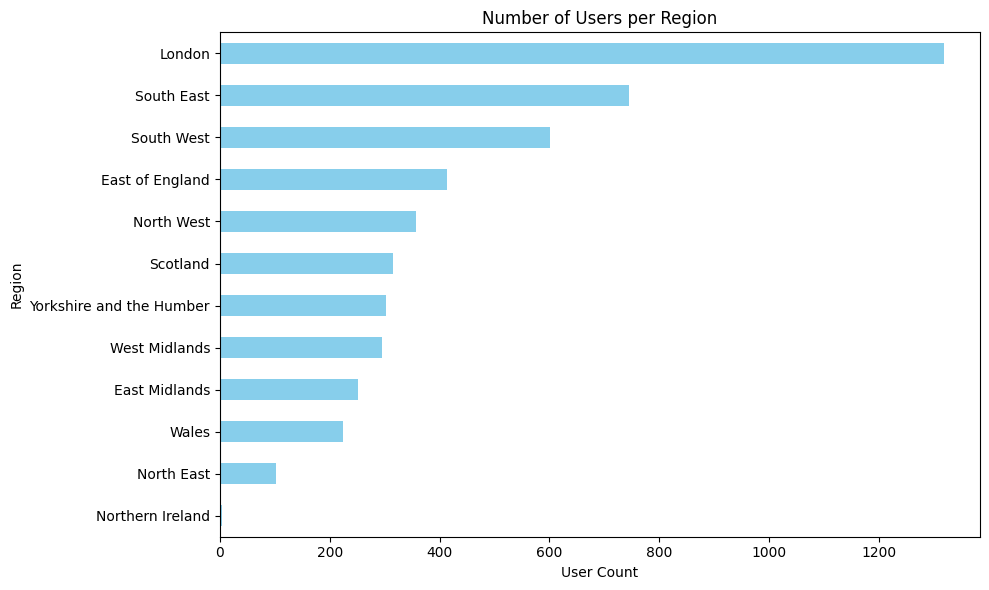

In [7]:
region_counts = users['user_nuts1'].map(nuts1_to_region).value_counts()

import matplotlib.pyplot as plt

region_counts.sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Number of Users per Region')
plt.xlabel('User Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


What are user segments?

In [ ]:
unique_segments = users['user_segment'].dropna().unique()

print(f"\nTotal segments (excluding NaNs): {len(unique_segments)}\n")
print("List of SEGMENTS:")
for segment in sorted(unique_segments):
    print(f"- {segment}")


Total segements (excluding NaNs): 2

List of SEGMENTS:
- Proposition
- Top Up


Parece que los clientes están clasificados en dos categorías 

In [16]:
import numpy as np
# Merge orders with user segments
orders_with_segment = orders.merge(users[['user_id', 'user_segment']], on='user_id', how='left')
orders_with_segment = orders_with_segment.dropna(subset=['ordered_items', 'user_segment'])

# Define safe function to count items
def count_items(x):
    if isinstance(x, (list, np.ndarray)):
        return len(x)
    return 0  # Fallback for unexpected types

orders_with_segment['num_items'] = orders_with_segment['ordered_items'].apply(count_items)

# Group by user_segment
summary = orders_with_segment.groupby('user_segment').agg(
    total_orders=('user_id', 'count'),
    total_items=('num_items', 'sum'),
    avg_items_per_order=('num_items', 'mean')
).reset_index()

print("=== Order Behavior by User Segment ===")
print(summary.to_string(index=False))


=== Order Behavior by User Segment ===
user_segment  total_orders  total_items  avg_items_per_order
 Proposition          4177        65373            15.650706
      Top Up          4596        42585             9.265666


In [13]:
orders_with_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
 6   user_segment    8773 non-null   object        
 7   num_items       8773 non-null   int64         
dtypes: datetime64[us](2), int64(3), object(3)
memory usage: 548.4+ KB


In [13]:
mixed_columns = check_mixed_data_types(users)
print(mixed_columns)

{'user_nuts1': user_nuts1
<class 'str'>         4932
<class 'NoneType'>      51
Name: count, dtype: int64}


How many different products are there?

In [2]:
order_items = orders['ordered_items'].explode()
regular_items = regulars['variant_id']
abandoned_items = abandoned['variant_id'].explode()
inventory_items = inventory['variant_id']

# Create a dictionary of Series
sources = {
    'orders': order_items,
    'regulars': regular_items,
    'abandoned_cart': abandoned_items,
    'inventory': inventory_items
}

# Store all items to combine later
all_items = []

print("=== Product ID Analysis per Source ===")
for name, series in sources.items():
    # Count NaNs before dropping
    nan_count = series.isna().sum()
    unique_count = series.dropna().astype(str).nunique()
    print(f"{name:<15} | NaNs: {nan_count:<5} | Unique IDs: {unique_count}")
    
    # Add cleaned series to combined list
    all_items.append(series.dropna().astype(str))

# Combine and get total unique
total_unique = pd.concat(all_items).nunique()
print(f"\nTotal unique product IDs across all datasets: {total_unique}")

=== Product ID Analysis per Source ===
orders          | NaNs: 0     | Unique IDs: 2117
regulars        | NaNs: 0     | Unique IDs: 1843
abandoned_cart  | NaNs: 0     | Unique IDs: 1522
inventory       | NaNs: 0     | Unique IDs: 1733

Total unique product IDs across all datasets: 2467


How many products in the orders are not in inventory? 

In [ ]:
order_items = orders['ordered_items'].explode().dropna().astype(str).unique()

inventory_ids = inventory['variant_id'].dropna().astype(str).unique()

# Find which order items are not in inventory
missing = set(order_items) - set(inventory_ids)

print(f"Number of product IDs in orders not found in inventory: {len(missing)}")
# Find inventory items never ordered
unordered = set(inventory_ids) - set(order_items)

print(f"Number of products in inventory never ordered: {len(unordered)}")
# Find abandoned items not in inventory
abandoned_items = abandoned['variant_id'].explode().dropna().astype(str).unique()
missing_abandoned = set(abandoned_items) - set(inventory_ids)

print(f"Number of abandoned product IDs not found in inventory: {len(missing_abandoned)}")

inventory_not_in_abandoned = set(inventory_ids) - set(abandoned_items)
print(f"Number of inventory product IDs not found in abandonded: {len(inventory_not_in_abandoned)}")

# Get regulars product IDs
regular_items = regulars['variant_id'].dropna().astype(str).unique()
# Find regulars not in inventory
missing_regulars = set(regular_items) - set(inventory_ids)

print(f"Number of regular product IDs not found in inventory: {len(missing_regulars)}")

Number of product IDs in orders not found in inventory: 640
Number of products in inventory never ordered: 256
Number of abandoned product IDs not found in inventory: 114
Number of inventory product IDs not found in abandonded: 325
Number of regular product IDs not found in inventory: 558


How many different product types are there?

In [ ]:
unique_product_types = inventory['product_type'].nunique()
print(f"\nTotal unique product types in the inventary: {unique_product_types}")
print(unique_product_types.unique())


Total unique product types in the inventary: 59


How many different vendors are there?

In [ ]:
vendors = inventory['vendor'].dropna().unique()
print(f"\nTotal vendors (excluding NaNs): {len(vendors)}\n")
print("List of vendors:")
for vendor in sorted(vendors):
    print(f"- {vendor}")


Total vendors (excluding NaNs): 412

List of vendors:
- 7up
- absolut
- alpro
- always
- ambrosia
- amisa
- amoy
- andrex
- angelcare
- annabelkarmel
- ape
- aperol
- aptamil
- aquafresh
- ariel
- artisangrains
- aspall
- astonish
- attitude
- aussie
- aveeno
- avent
- bacardi
- bacofoil
- badshah
- baileys
- bakers
- bamboonature
- banrockstation
- barefoot
- batchelors
- baxters
- bdf
- beamingbaby
- beast
- belazu
- belvoir
- benadryl
- betterbodyfoods
- betteryou
- billingtons
- biobag
- biod
- biona
- bisto
- bluediamond
- bluedragon
- bold
- bombaysapphire
- bonjela
- bonsan
- bother
- braggs
- brancottestate
- branston
- brewdog
- brita
- brooklyn
- brownpolson
- brushd
- budweiser
- budweiserbudvar
- bulldog
- butchers
- cadbury
- cafedirect
- calcough
- calgon
- calpol
- calprofen
- campari
- campoviejo
- caprisun
- captainmorgan
- cardinis
- carex
- carling
- carlsberg
- carnation
- casillerodeldiablo
- catsan
- cawstonpress
- cesar
- childsfarm
- cif
- clearspring
- clipper

How many different tags are there?

In [ ]:
total_tags = inventory['tags'].dropna().explode().unique()
print(f"\nTotal tags (excluding NaNs): {len(total_tags)}\n")
total_tags = [str(tag) for tag in total_tags if pd.notna(tag)] ## cuidado

print("List of tags:")
for tag in sorted(total_tags):
    print(f"- {tag}")


Total tags (excluding NaNs): 215

List of tags:
- adult-incontinence
- aerosol
- after-sun
- aftershave-care
- air-care
- all-purpose-cleaner
- aluminium-foil
- b-corp
- baby-toddler-snacks
- baby-wipes
- baking-ingredients
- baking-paper
- bars
- bathroom
- bathroom-limescale-cleaner
- bcorp
- beans-pulses-lentils
- bin-bags
- biscuits
- body-skincare
- bubble-bath
- carbon-neutral
- cat-treats
- cereal-bars
- cereals
- cf
- champagne-sparkling-wine
- chocolate
- christmas
- chutney-pickle
- cider
- cleaning-utensils
- cleaning-wipes
- cling-film
- coconut-milk
- coconut-milk-cream
- condiments
- conditioner
- condoms
- cooking-pastes
- cough-cold
- cough-colds
- crackers
- craft-beer
- crisps-popcorn
- cruelty-free
- curry-sauce-paste
- dairy-milk
- delicates-stain-remover
- dental-accessories
- deodorant
- desserts
- discontinue
- dishwasher-salt
- dishwasher-tablets
- dog-treats
- dry-cat-food
- dry-dog-food
- drying-ironing
- dummies
- eco
- everyday-cereal
- everyday-tea
- extra

In [2]:
# 1. Explode the ordered_items list to have one item per row
exploded_orders = orders.explode('ordered_items')

# 2. Merge with inventory to get product information
orders_with_product_info = exploded_orders.merge(
    inventory,
    left_on='ordered_items',
    right_on='variant_id',
    how='left'
)

# 3. Group by product_type and count
top_products = (
    orders_with_product_info
    .groupby('product_type')
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='purchase_count')
)

# 4. Display the result
print(top_products)


                       product_type  purchase_count
0                 cleaning-products            9676
1               tins-packaged-foods            8959
2        long-life-milk-substitutes            6637
3   toilet-roll-kitchen-roll-tissue            6314
4                       dishwashing            4362
5                soft-drinks-mixers            3808
6              snacks-confectionery            3787
7               cooking-ingredients            3150
8                            cereal            3014
9              condiments-dressings            2821
10                   cooking-sauces            2631
11               pasta-rice-noodles            2443
12        fabric-softener-freshener            2443
13                           dental            2161
14                biscuits-crackers            2008
15             hand-soap-sanitisers            1981
16                          spreads            1926
17                      home-baking            1808
18          

In [5]:
# 1. Merge regulars with inventory to get product_type info
regulars_with_info = regulars.merge(inventory, on='variant_id', how='left')

# 2. Group by product_type and count how often each appears
top_regular_categories = (
    regulars_with_info
    .groupby('product_type')
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='count')
)

# 3. Display the result
print(top_regular_categories)




                       product_type  count
0                 cleaning-products   1877
1               tins-packaged-foods   1402
2                       dishwashing    834
3   toilet-roll-kitchen-roll-tissue    802
4               cooking-ingredients    784
5              snacks-confectionery    660
6        long-life-milk-substitutes    566
7              condiments-dressings    521
8                soft-drinks-mixers    482
9                            cereal    471
10               pasta-rice-noodles    461
11                   cooking-sauces    444
12                           dental    430
13                      home-baking    403
14             hand-soap-sanitisers    388
15                          spreads    380
16                biscuits-crackers    326
17        fabric-softener-freshener    321
18                         haircare    299
19                         bin-bags    286


In [6]:
# 1. Explode the list of variant_ids so each product is on its own row
abandoned_exploded = abandoned.explode('variant_id')

# 2. Merge with inventory to get product_type
abandoned_with_info = abandoned_exploded.merge(inventory, on='variant_id', how='left')

# 3. Group by product_type and count
top_abandoned_categories = (
    abandoned_with_info
    .groupby('product_type')
    .size()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='count')
)

# 4. Display the result
print(top_abandoned_categories)


                       product_type  count
0               tins-packaged-foods   2700
1                 cleaning-products   2525
2   toilet-roll-kitchen-roll-tissue   2257
3                soft-drinks-mixers   1769
4                       dishwashing   1694
5              snacks-confectionery   1157
6        long-life-milk-substitutes   1134
7         fabric-softener-freshener   1070
8                    cooking-sauces    937
9               cooking-ingredients    928
10             condiments-dressings    833
11               pasta-rice-noodles    811
12                           dental    809
13                           cereal    700
14                biscuits-crackers    692
15                          spreads    643
16               washing-liquid-gel    615
17                 washing-capsules    581
18             hand-soap-sanitisers    563
19                   washing-powder    511
